# Life cycle of Machine learning project
- understanding the problem statement
- Data collection
- data checks to perform
- Exploratory data analysis
- data pre-processing
- model training
- choose best model

# 1)Problem statement 
- This project understand how the students performance (test scores) is affected bv other variables such as Gender ,Ethnicity,parental level of education,Lunch and Test preparation course


# 2 Import Data and required packages 
- importing pandas,numpy,matplotlib,seaborband waring library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### import CSV Data as pandas Dataframe

In [2]:
df  = pd.read_csv('C:/Users/suhas/EDA_FULL_CASE_STUDY/EDA_Student_performance/stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### shape of the data

In [4]:
df.shape

(1000, 8)

## 2.2 Dataset information
- gender : sex of student -> (male,female)
- race/ethnicity : ethnicity of teh student ->(graup A,B,C,D.E)
- parental level of education : parents final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced lunch)
- test preparaton course : complete or not complete before test
- math score 
- reading score
- writing score

## 3. Data checks to perform
- Check missing values
- check duplicates
- check data type
- check the number of unique values of each column
- check statistics of data set
- check varios categories present in the different categorical column

## 3.1 check missing value

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## 3.2 check duplicate 

In [6]:
df.duplicated().sum()

0

## their are no duplicated values in the dataset

## 3.3 check the data types 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 checking the unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## 3.5 checking the statistics of data set

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


## insight
- from above description of numerical data,all mean are very close to each other-btw 66-69
- All the stadard deviation are also close - btw 14.6- 15.19
- While there is a minimun score 0 for math for writing minimum isa much higher=10 and for reading higher =17

## 3.7 Exploring Data

In [10]:
print('Categories in gender variable:    ',end = '')
print(df['gender'].unique())

print('Categories in race/ethnicity variable:    ',end = '')
print(df['race/ethnicity'].unique())

print('Categories in parental level of education variable:    ',end = '')
print(df['parental level of education'].unique())

print('Categories in lunch variable:    ',end = '')
print(df['lunch'].unique())

print('Categories in test preparation course variable:    ',end = '')
print(df['test preparation course'].unique())

Categories in gender variable:    ['female' 'male']
Categories in race/ethnicity variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:    ['standard' 'free/reduced']
Categories in test preparation course variable:    ['none' 'completed']


## 3.8 Adding total_score and average columns

In [11]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
# define numerical and categorical coulmn
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']


#print coulumns
print('We have {} numerical features : {} '.format(len(numeric_features),numeric_features))
print('We have {} numerical features : {} '.format(len(categorical_features),categorical_features))

We have 5 numerical features : ['math score', 'reading score', 'writing score', 'total_score', 'average'] 
We have 5 numerical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] 


In [13]:
# number of student having full marks

reading_full = df[df['reading score']== 100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()

#printing values
print(f'Number of student wuth full marks in reading:{reading_full}')
print(f'Number of student wuth full marks in writing:{writing_full}')
print(f'Number of student wuth full marks in math:{math_full}')

Number of student wuth full marks in reading:17
Number of student wuth full marks in writing:14
Number of student wuth full marks in math:7


In [14]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## insights 
- From above values we ge tstudents have performed the worst in math
- Best performance is in reading section



## 4. Exploring Data (visualization)

### 4.1 Viscualize average score distribution to make some conclusion
- histogram
- Kernal distribution function

<Axes: xlabel='average', ylabel='Count'>

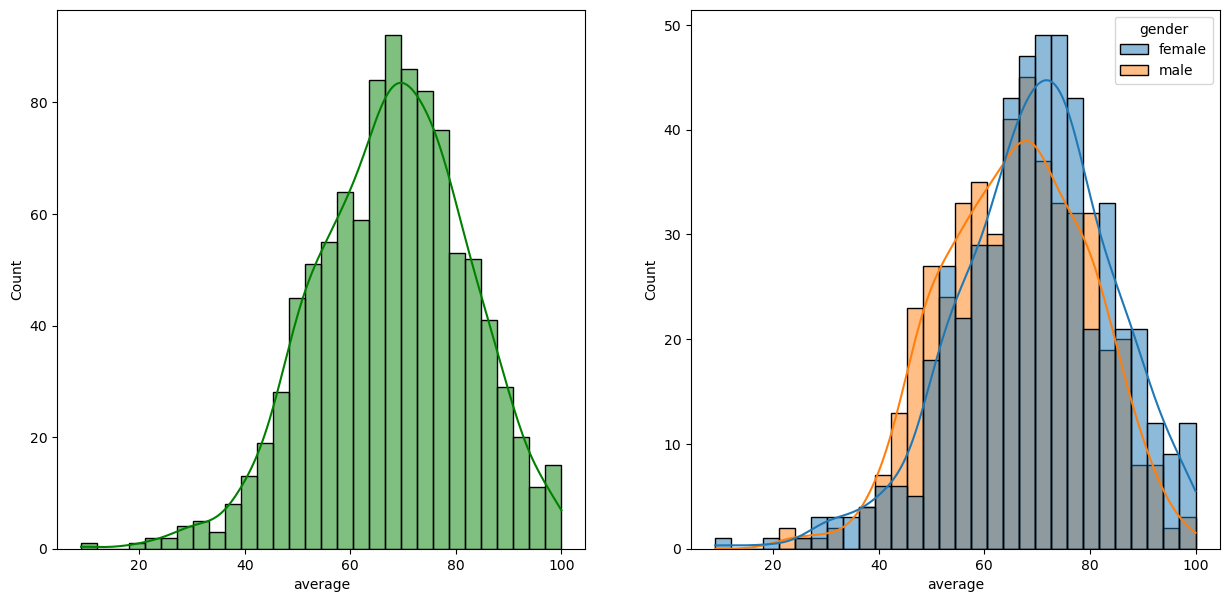

In [15]:
fig,axs = plt.subplots(1 ,2 ,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average' , bins = 30 , kde =True , color='g')
plt.subplot(122)
sns.histplot(data = df , x='average' , bins = 30, kde = True ,hue = 'gender')

## insights
- Female students tends to perform better and have better average than male students

<Axes: xlabel='average', ylabel='Count'>

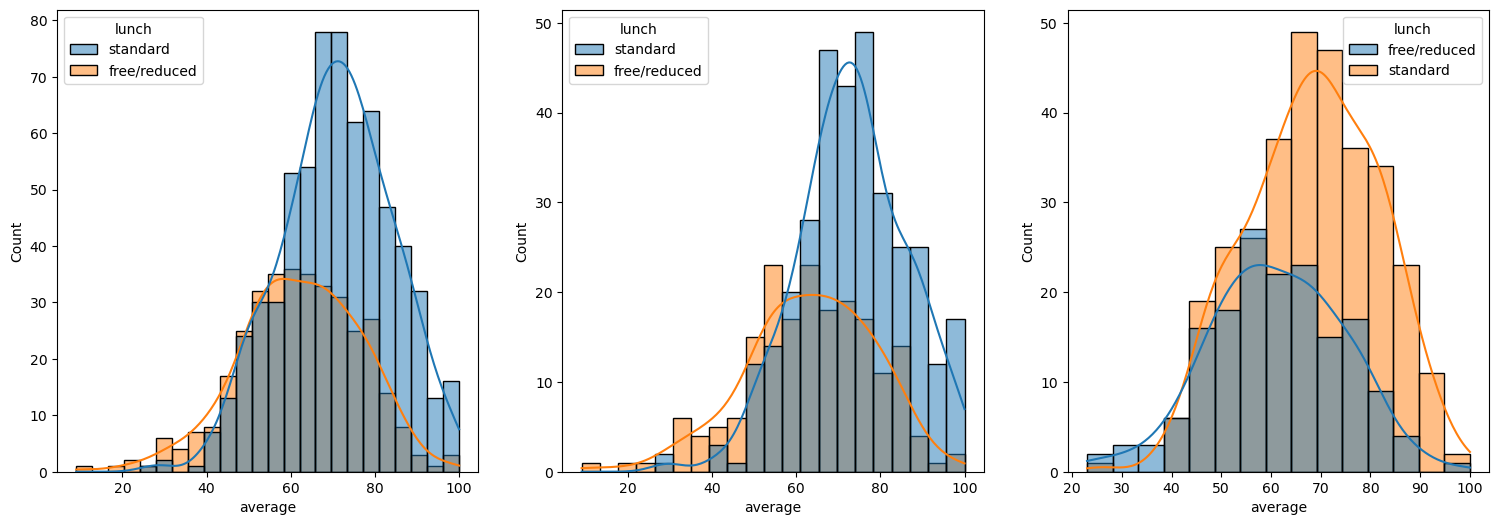

In [16]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df , x = 'average' ,kde = True , hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'] , x = 'average',kde = True,hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'] , x = 'average',kde = True,hue = 'lunch')

## insights 
- Standard lunch helps perform well in exams 
- Standard lunch helps perform will in exam irrespective of gender

<Axes: xlabel='average', ylabel='Count'>

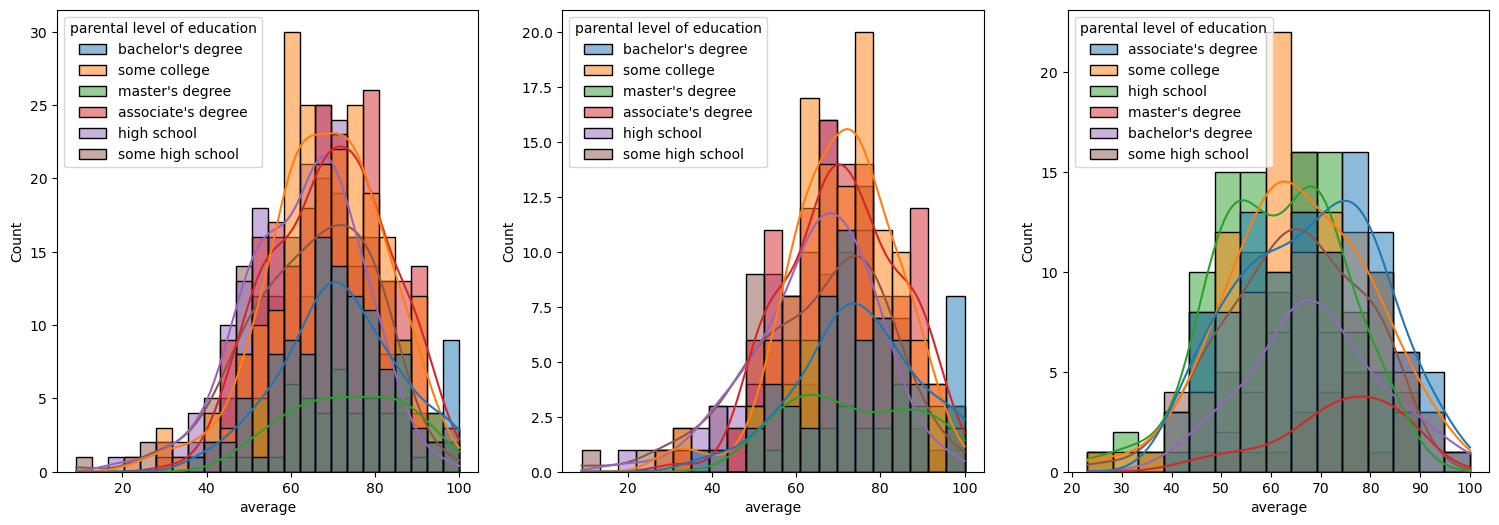

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df , x = 'average' , kde = True,hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'],x  = 'average',kde = True , hue ='parental level of education')
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'],x  = 'average',kde = True , hue ='parental level of education')

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

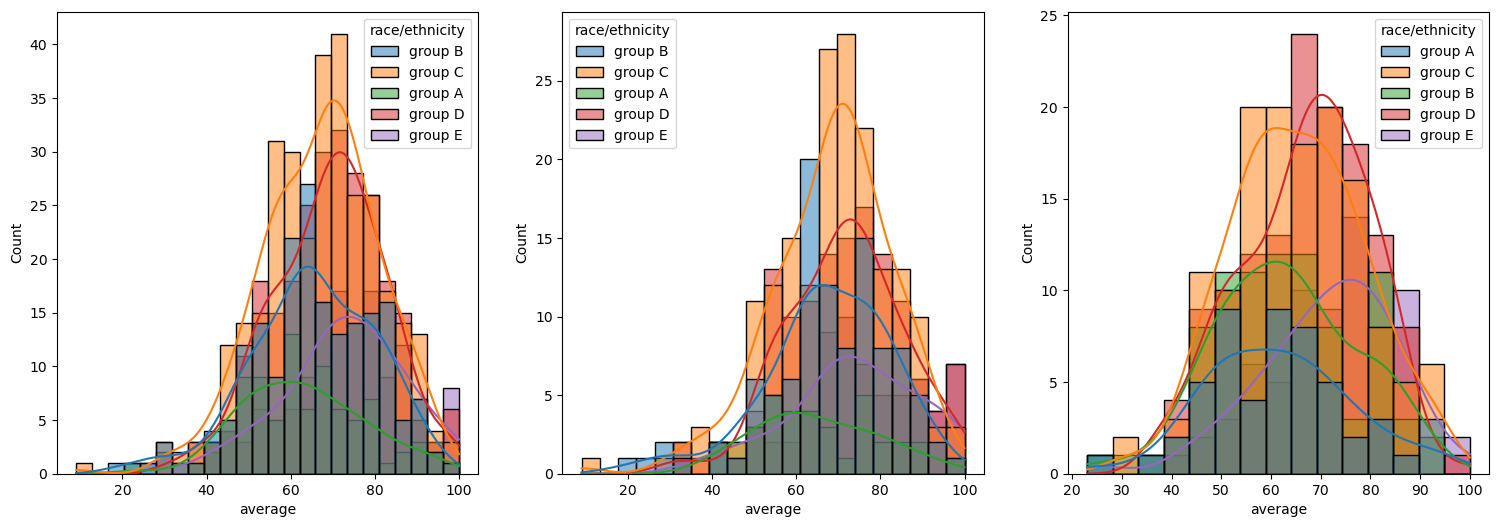

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data = df[df.gender=='female'], x = 'average' ,kde = True , hue = 'race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender=='male'], x = 'average' ,kde = True , hue = 'race/ethnicity')
plt.show()

#### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

## 4.2 Maximum score of student in all three subjects

<Axes: title={'center': 'Writing Score'}, ylabel='writing score'>

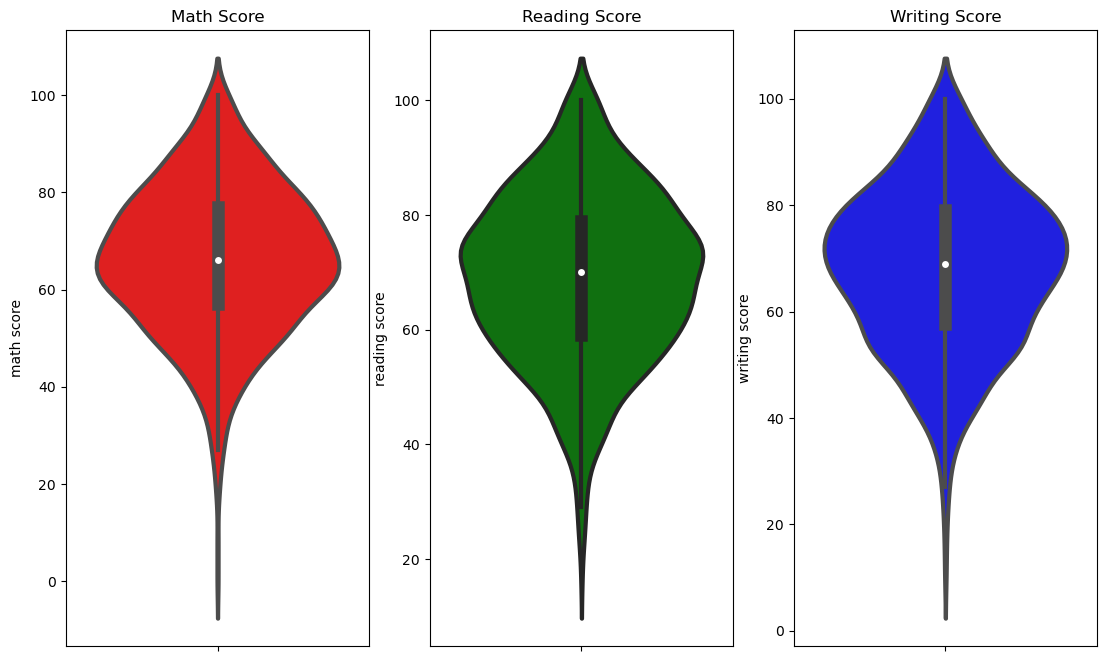

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(data = df , y = 'math score' , color = 'red' , linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(data = df , y = 'reading score' , color = 'green' , linewidth = 3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(data = df ,y  = 'writing score' , color = 'blue' , linewidth = 3)

### insights
- From above three plots its clearly visible thata most of the students score in between 60-80 in maths ,whereas in reading and writing most of them score between 50-80

## Univarariate analysis using pieplot

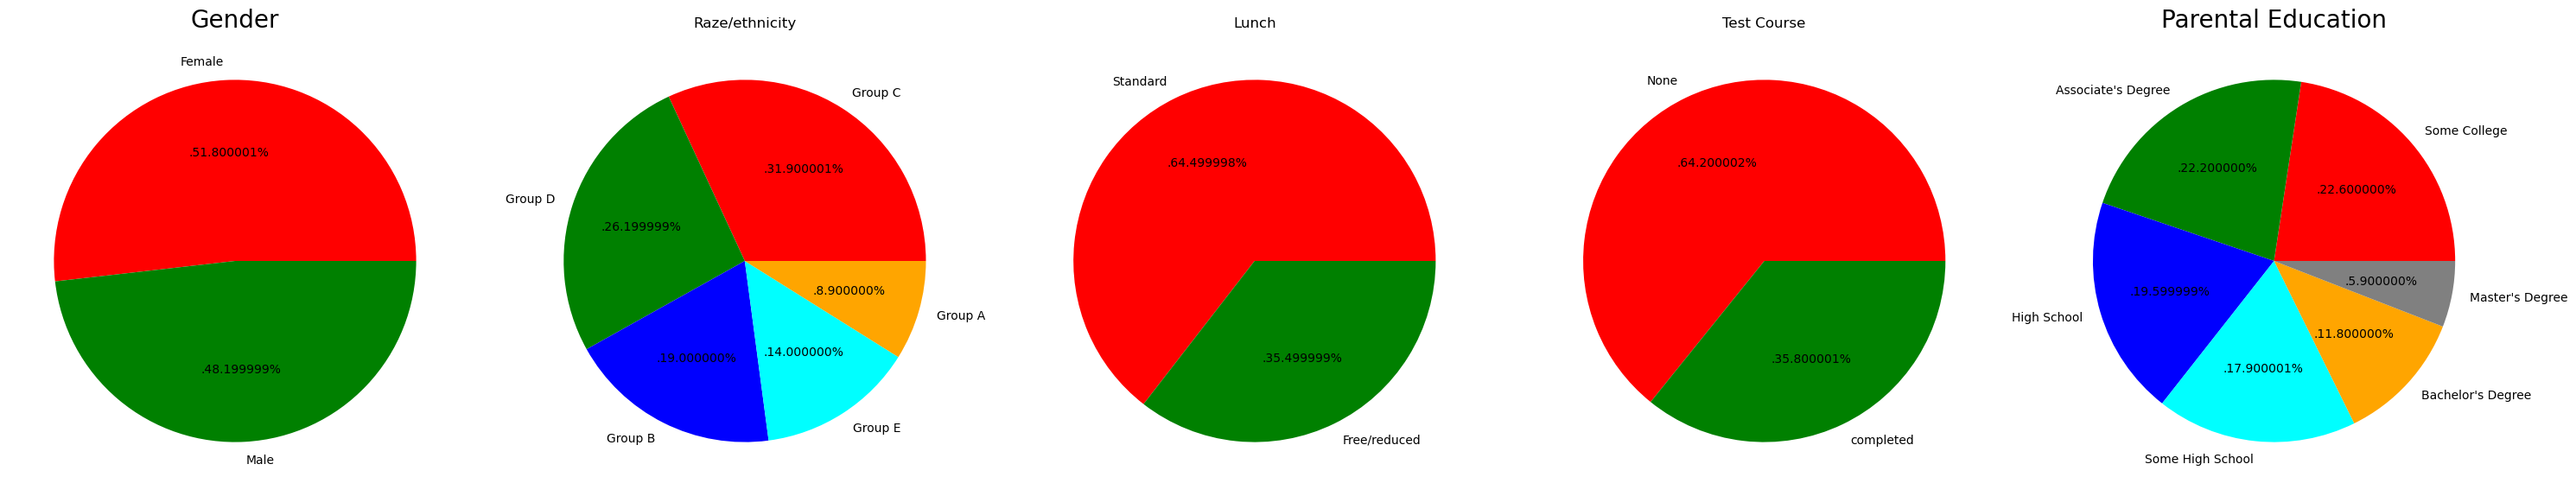

In [20]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,colors=color , labels = labels , autopct='.%2f%%')
plt.title('Gender' ,fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C' , 'Group D','Group B','Group E','Group A'
color = ['red' , 'green', 'blue' ,'cyan' , 'orange']

plt.pie(size , colors=color , labels=labels , autopct='.%2f%%')
plt.title('Raze/ethnicity')
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard' , 'Free/reduced'
color = ['red' , 'green']

plt.pie(size , colors=color , labels=labels , autopct='.%2f%%')
plt.title('Lunch')
plt.axis('off')

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None' , 'completed'
color = ['red' , 'green']

plt.pie(size , colors=color , labels=labels , autopct='.%2f%%')
plt.title('Test Course')
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()



#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## Univariate analysis(How is distrubution of gender?)

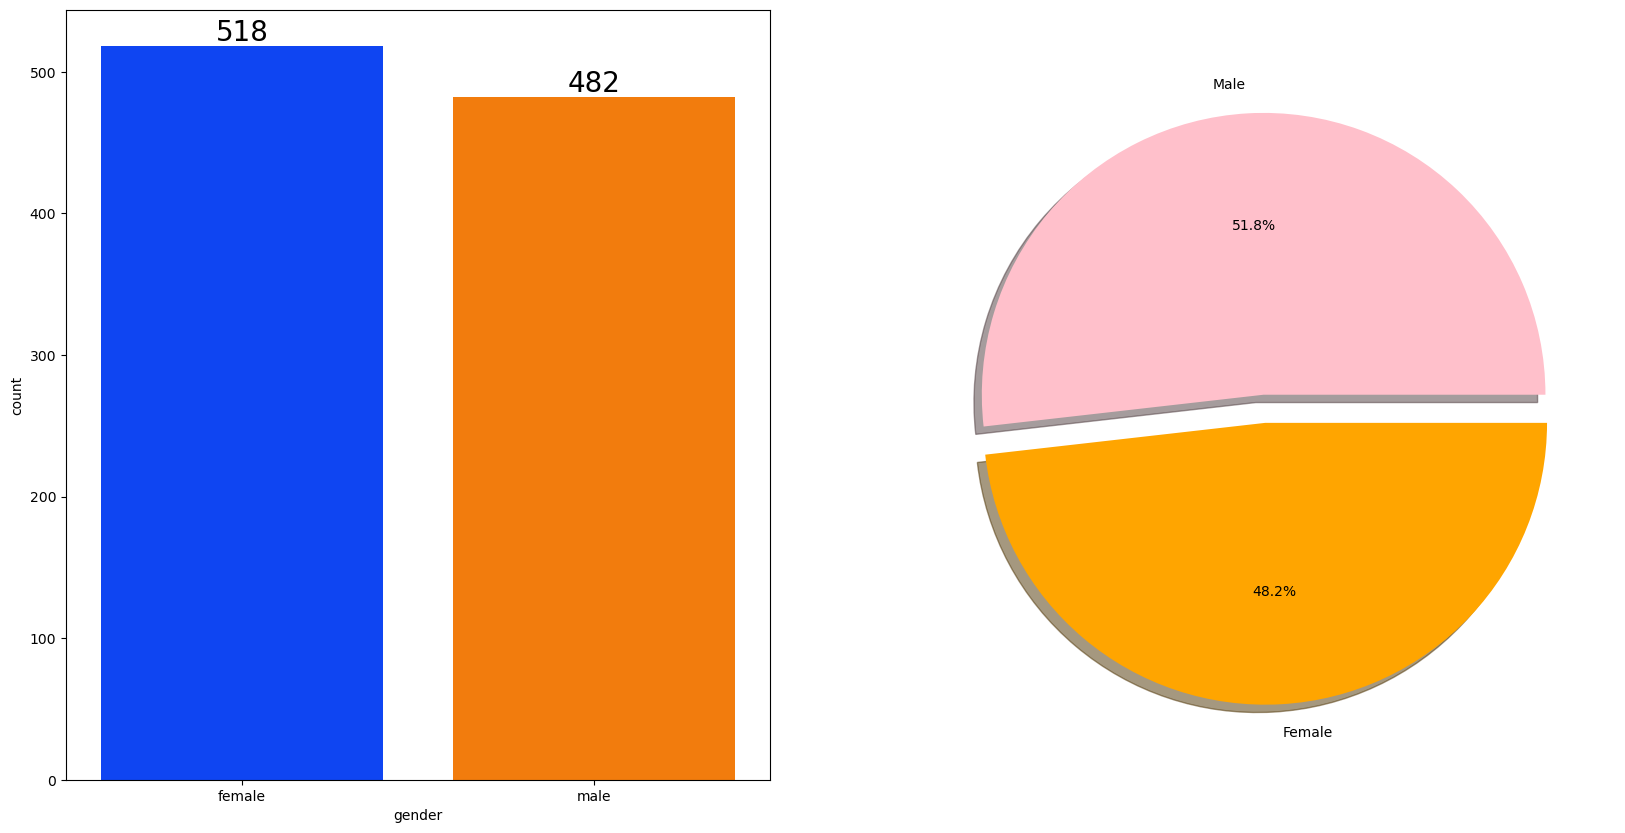

In [21]:
f,ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot(data = df , x = df['gender'] , palette='bright' , ax = ax[0], saturation=0.90)
for container in ax[0].containers:  # giver count value 518,482 above bars
    ax[0].bar_label(container,color = 'black',size = 20)

plt.pie(x = df['gender'].value_counts(),labels=['Male' , 'Female'],explode=(0,0.1),autopct='%1.1f%%',shadow=True,colors = ['pink','orange'])
plt.show()

## Insights
- Gender has balanced data with female student 518(52%) and male student 482(48%)

### BIvaraite analysis (is gender has any impact on student performance?)

In [22]:
gender_group = df.groupby(['gender'])
gender_group

In [23]:
gender_group = gender_group.describe()

In [24]:
gender_group

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score             ... total_score        average             \
               count       mean  ...         75%    max   count       mean   
gender                           ...                                         
female         518.0  72.608108  ...      236.00  300.0   518.0  69.569498   
male           482.0  65.473029  ...      228.75  300.0   482.0  65.837483   

                                                                 
              std   min        25%        50%        75%    max  
gender                                                           
female  14.541809   9.0  60.666667  70.333333  78.666667  100.0  
male    13.698840  23.0  56.000000  66.333333  76.250000  100.0  

[2 rows x 40 columns]

In [25]:
gender_group.T

gender                   female        male
math score    count  518.000000  482.000000
              mean    63.633205   68.728216
              std     15.491453   14.356277
              min      0.000000   27.000000
              25%     54.000000   59.000000
              50%     65.000000   69.000000
              75%     74.000000   79.000000
              max    100.000000  100.000000
reading score count  518.000000  482.000000
              mean    72.608108   65.473029
              std     14.378245   13.931832
              min     17.000000   23.000000
              25%     63.250000   56.000000
              50%     73.000000   66.000000
              75%     83.000000   75.000000
              max    100.000000  100.000000
writing score count  518.000000  482.000000
              mean    72.467181   63.311203
              std     14.844842   14.113832
              min     10.000000   15.000000
              25%     64.000000   53.000000
              50%     74.000000   64.000000
              75%     82.000000   73.750000
              max    100.000000  100.000000
total_score   count  518.000000  482.000000
              mean   208.708494  197.512448
              std     43.625427   41.096520
              min     27.000000   69.000000
              25%    182.000000  168.000000
              50%    211.000000  199.000000
              75%    236.000000  228.750000
              max    300.000000  300.000000
average       count  518.000000  482.000000
              mean    69.569498   65.837483
              std     14.541809   13.698840
              min      9.000000   23.000000
              25%     60.666667   56.000000
              50%     70.333333   66.333333
              75%     78.666667   76.250000
              max    100.000000  100.000000

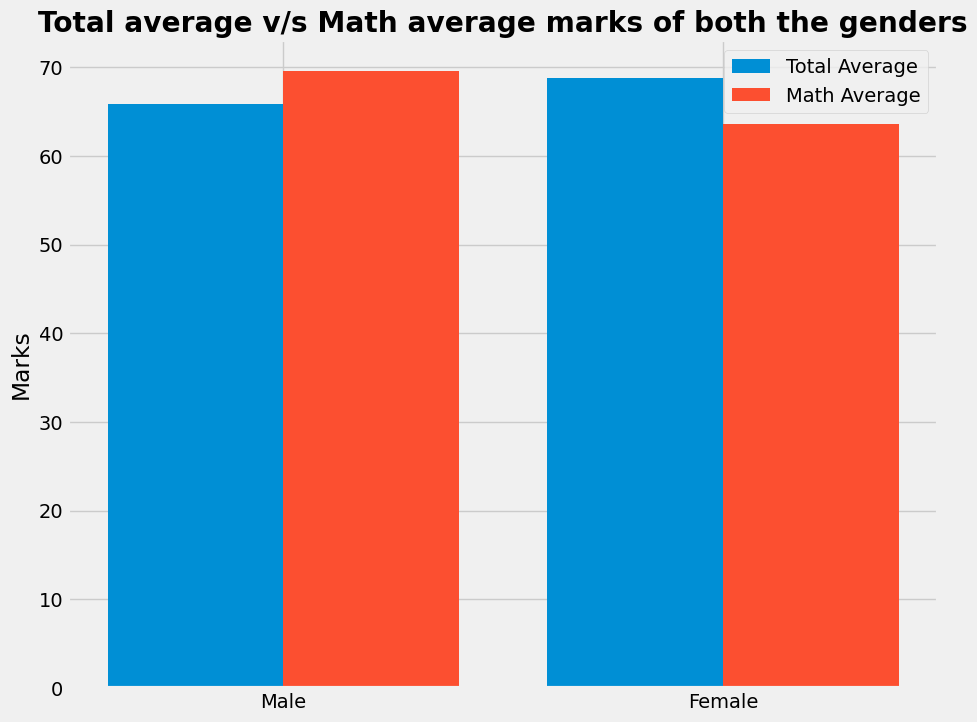

In [51]:
plt.figure(figsize=(10,8))
X = ['Male','Female']

female_score = [gender_group['average']['mean'][0],gender_group['math score']['mean'][0]]
male_score = [gender_group['average']['mean'][1],gender_group['math score']['mean'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2,male_score,0.4, label = 'Total Average')
plt.bar(X_axis + 0.2,female_score,0.4,label = 'Math Average')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

In [27]:
for containers in ax[0].containers:
    print(containers.datavalues)

[518. 482.]


#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

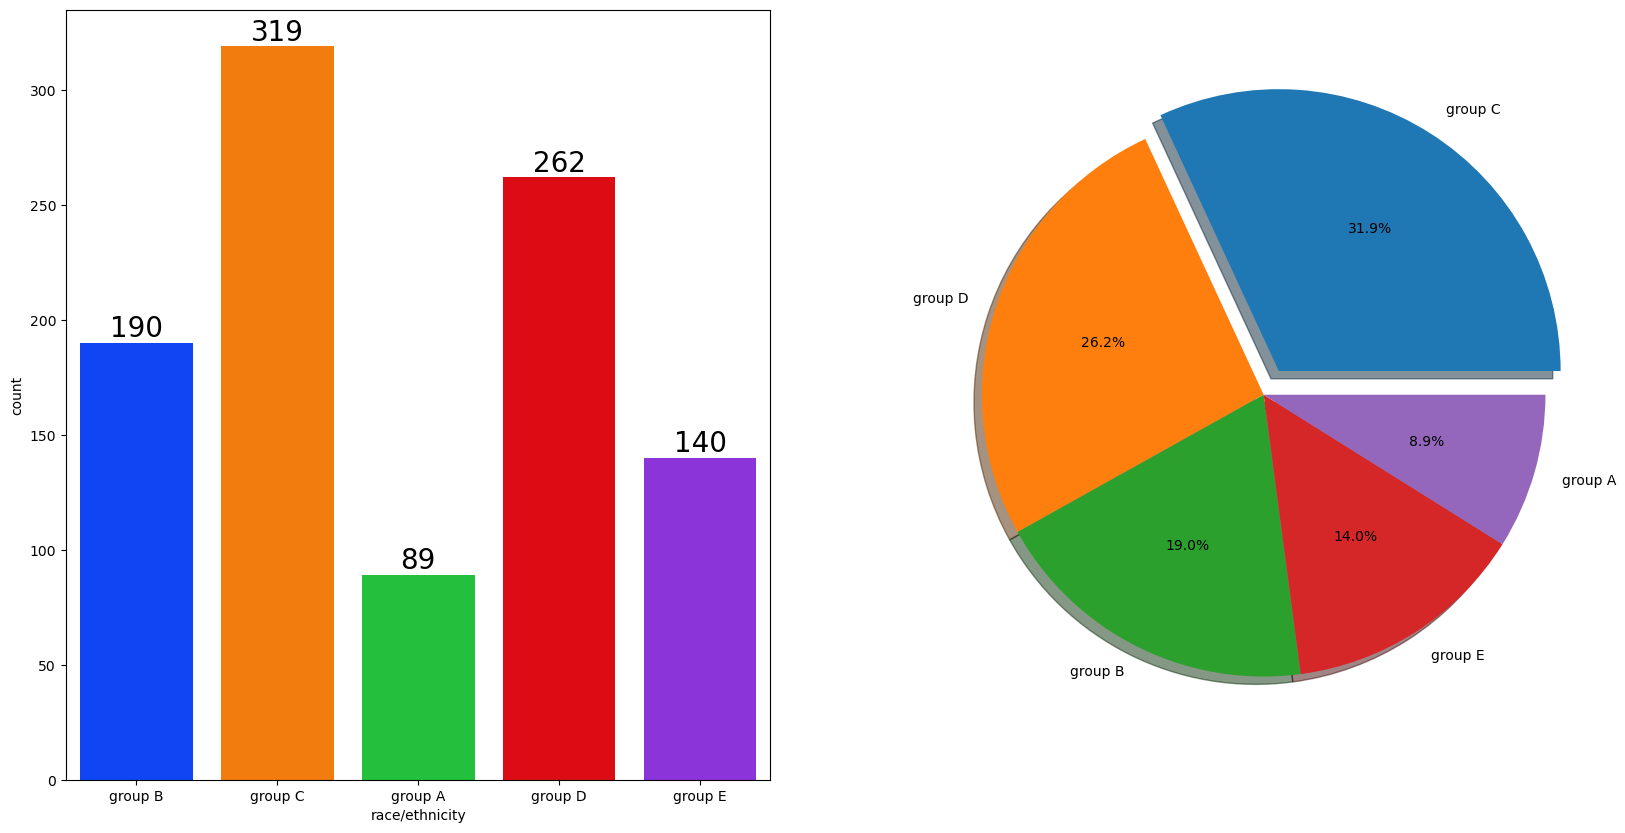

In [28]:
f,ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot(data = df ,x = df['race/ethnicity'] , palette='bright' ,ax = ax[0],saturation=0.9)
for containers in ax[0].containers:
    ax[0].bar_label(containers,color = 'black',size = 20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels = df['race/ethnicity'].value_counts().index,explode = (0.1,0,0,0,0),autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

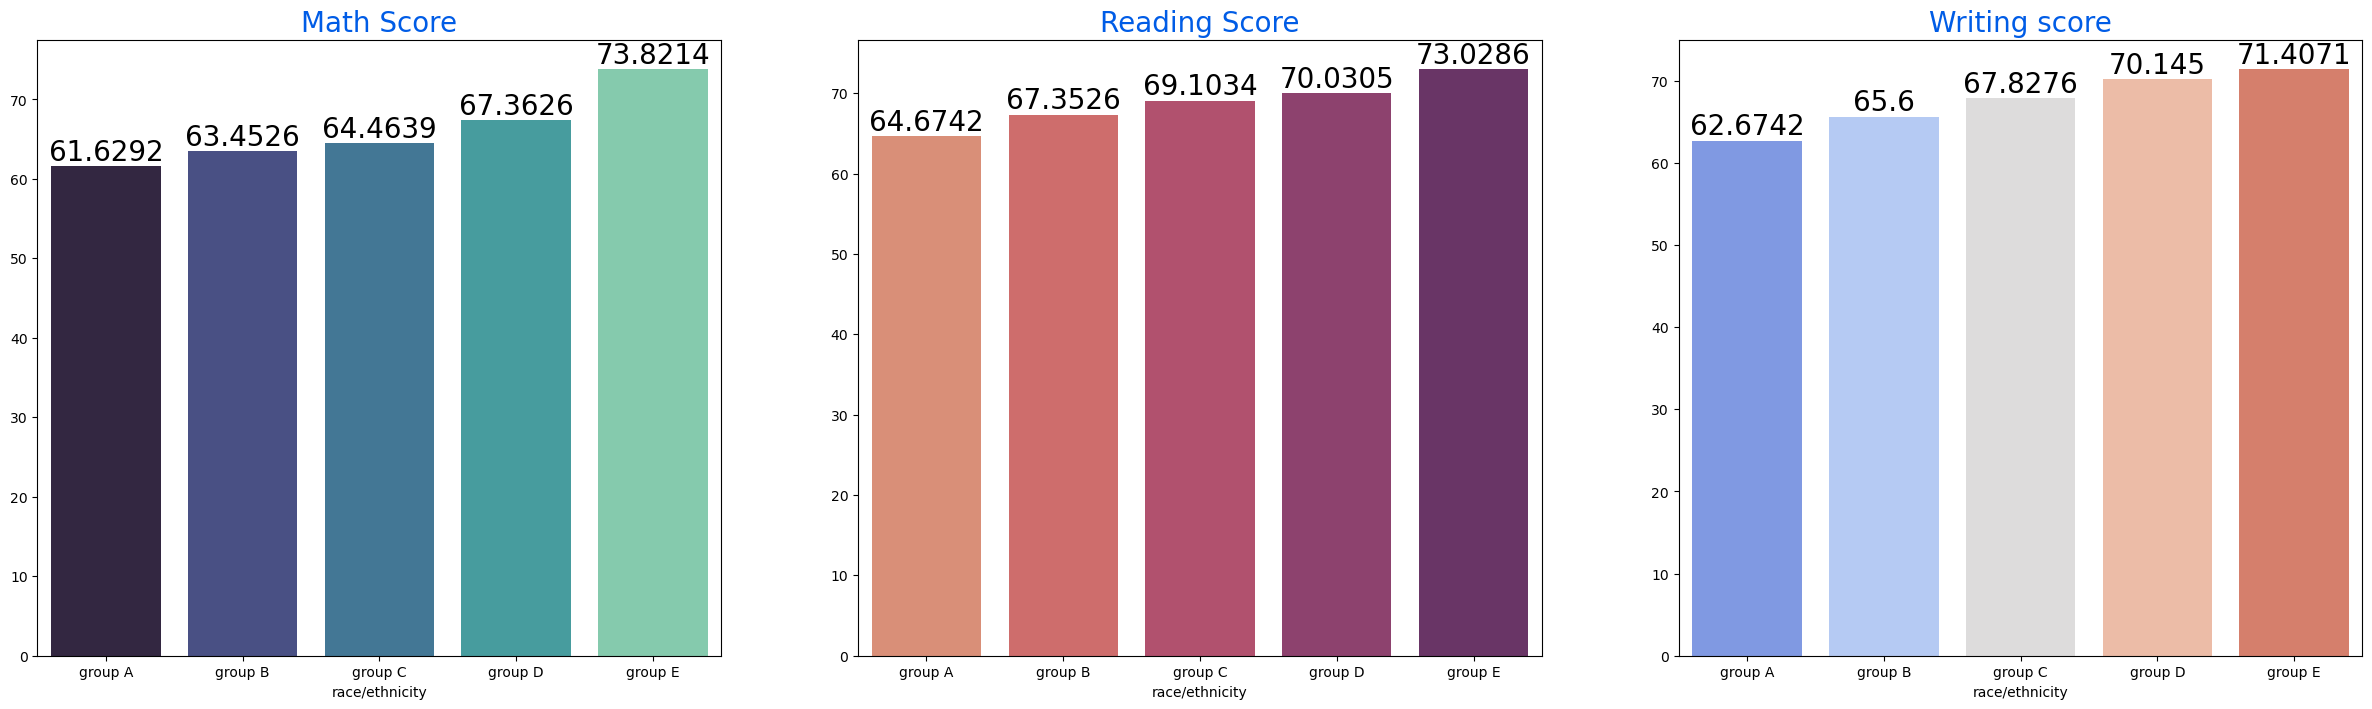

In [29]:
Group_data2 = df.groupby('race/ethnicity')
f,ax = plt.subplots(1,3,figsize= (30,8))
sns.barplot(x = Group_data2['math score'].mean().index,y = Group_data2['math score'].mean().values,palette='mako',ax = ax[0])
ax[0].set_title('Math Score',color='#005ce6' , size =20)

for containers in ax[0].containers:
    ax[0].bar_label(containers,color = 'Black',size = 20)
    
sns.barplot(x = Group_data2['reading score'].mean().index,y = Group_data2['reading score'].mean().values,palette='flare',ax = ax[1])
ax[1].set_title('Reading Score',color = '#005ce6',size=20)

for containers in ax[1].containers:
    ax[1].bar_label(containers,color = 'Black',size = 20)
    
sns.barplot(x = Group_data2['writing score'].mean().index,y = Group_data2['writing score'].mean().values,palette = 'coolwarm',ax = ax[2])
ax[2].set_title('Writing score',color = '#005ce6',size = 20)

for containers in ax[2].containers:
    ax[2].bar_label(containers,color='black',size = 20)

In [30]:
ax

array([<Axes: title={'center': 'Math Score'}, xlabel='race/ethnicity'>,
       <Axes: title={'center': 'Reading Score'}, xlabel='race/ethnicity'>,
       <Axes: title={'center': 'Writing score'}, xlabel='race/ethnicity'>],
      dtype=object)

### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

## univariate Analysis (what is educational background of students parent?)

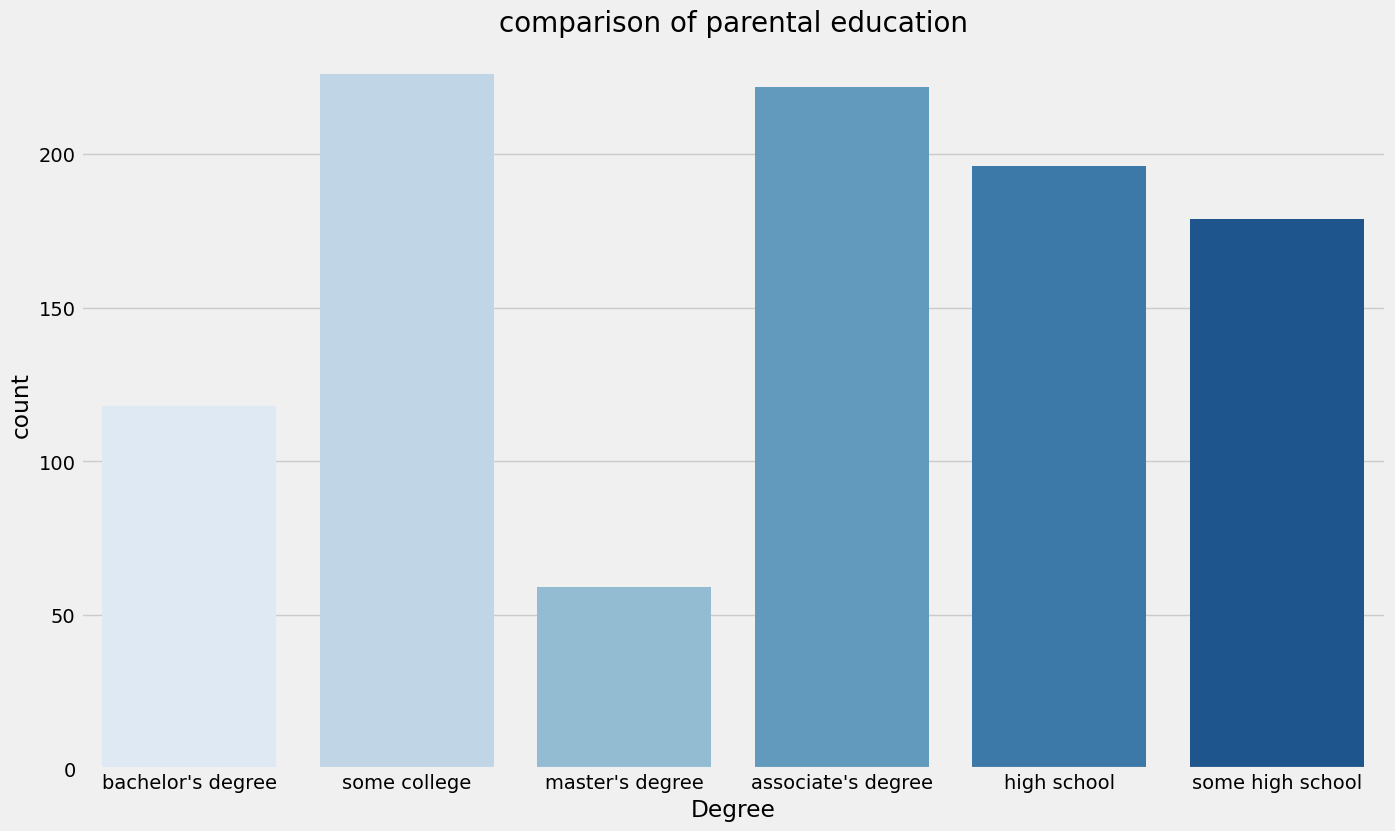

In [40]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df,x='parental level of education',palette='Blues')
plt.title('comparison of parental education' , fontweight = 30 , fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

<Axes: xlabel='parental level of education', ylabel='Count'>

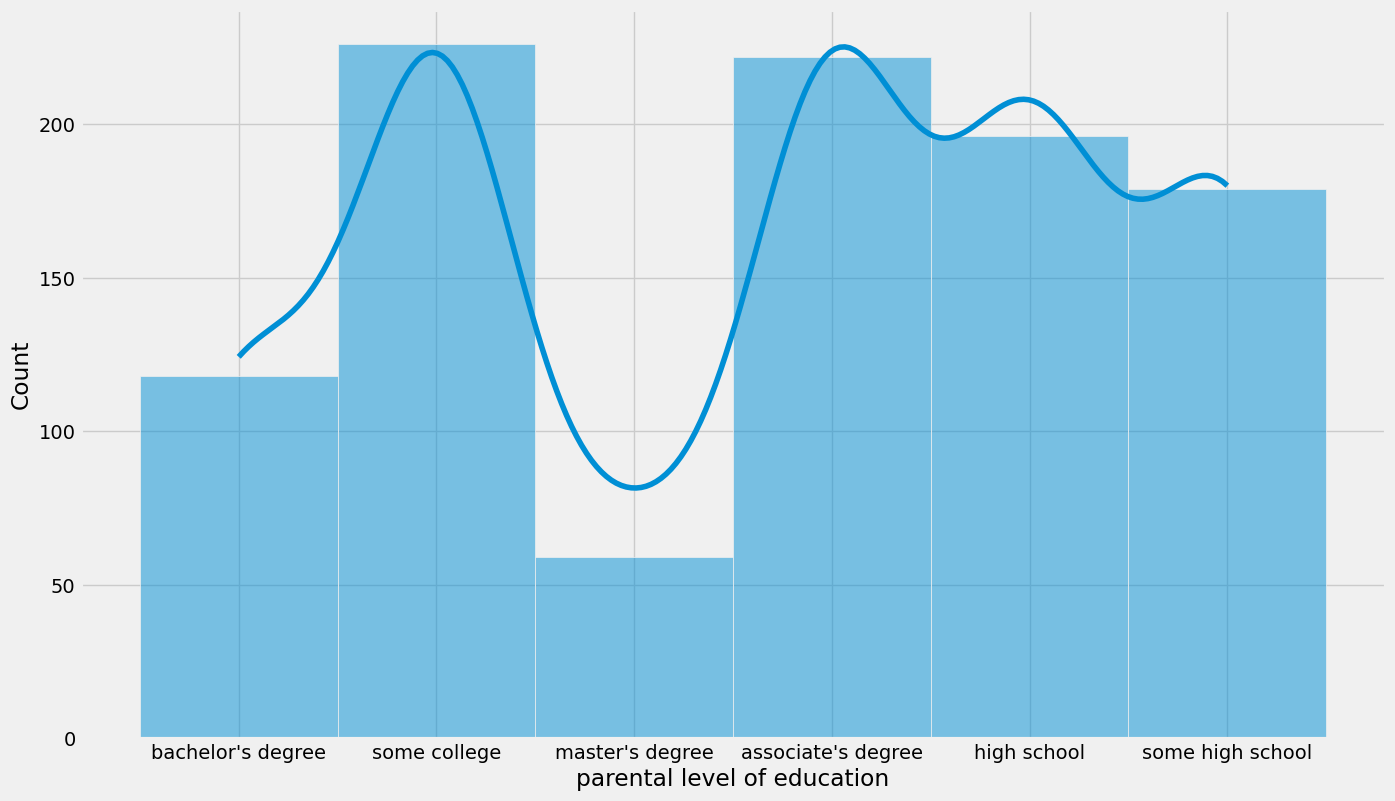

In [37]:
sns.histplot(df['parental level of education'],kde=True)

### insights
- large number of parents are from some colleges

#### Bivariate analysis(is parental education has any impact on students performance?)

In [44]:
parental_level_of_education = df.groupby('parental level of education')

In [45]:
parental_level_of_education

In [46]:
parental_level_of_education = parental_level_of_education.describe()

In [48]:
parental_level_of_education.T

parental level of education  associate's degree  bachelor's degree  \
math score    count                  222.000000         118.000000   
              mean                    67.882883          69.389831   
              std                     15.112093          14.943789   
              min                     26.000000          29.000000   
              25%                     57.000000          61.000000   
              50%                     67.000000          68.000000   
              75%                     80.000000          79.000000   
              max                    100.000000         100.000000   
reading score count                  222.000000         118.000000   
              mean                    70.927928          73.000000   
              std                     13.868948          14.285250   
              min                     31.000000          41.000000   
              25%                     61.000000          63.000000   
              50%                     72.500000          73.000000   
              75%                     81.000000          82.750000   
              max                    100.000000         100.000000   
writing score count                  222.000000         118.000000   
              mean                    69.896396          73.381356   
              std                     14.311122          14.728262   
              min                     35.000000          38.000000   
              25%                     58.000000          62.500000   
              50%                     70.500000          74.000000   
              75%                     80.000000          83.000000   
              max                    100.000000         100.000000   
total_score   count                  222.000000         118.000000   
              mean                   208.707207         215.771186   
              std                     41.012743          41.839827   
              min                     95.000000         117.000000   
              25%                    176.000000         192.250000   
              50%                    209.000000         213.500000   
              75%                    237.000000         242.000000   
              max                    300.000000         300.000000   
average       count                  222.000000         118.000000   
              mean                    69.569069          71.923729   
              std                     13.670914          13.946609   
              min                     31.666667          39.000000   
              25%                     58.666667          64.083333   
              50%                     69.666667          71.166667   
              75%                     79.000000          80.666667   
              max                    100.000000         100.000000   

parental level of education  high school  master's degree  some college  \
math score    count           196.000000        59.000000    226.000000   
              mean             62.137755        69.745763     67.128319   
              std              14.539651        15.153915     14.312897   
              min               8.000000        40.000000     19.000000   
              25%              53.750000        55.500000     59.000000   
              50%              63.000000        73.000000     67.500000   
              75%              72.000000        81.000000     76.000000   
              max              99.000000        95.000000    100.000000   
reading score count           196.000000        59.000000    226.000000   
              mean             64.704082        75.372881     69.460177   
              std              14.132130        13.775163     14.057049   
              min              24.000000        42.000000     23.000000   
              25%              54.000000        65.500000     60.000000   
              50%              66.000000        76.000000     70.500000   
    

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


In [68]:
df['writing score'].mean()

68.054

In [67]:
df.groupby('total_score').agg({'writing score':'median'})

,writing score
total_score,
27,10.0
55,23.0
69,15.0
70,19.0
78,25.0
...,...
293,100.0
296,99.5
297,99.5


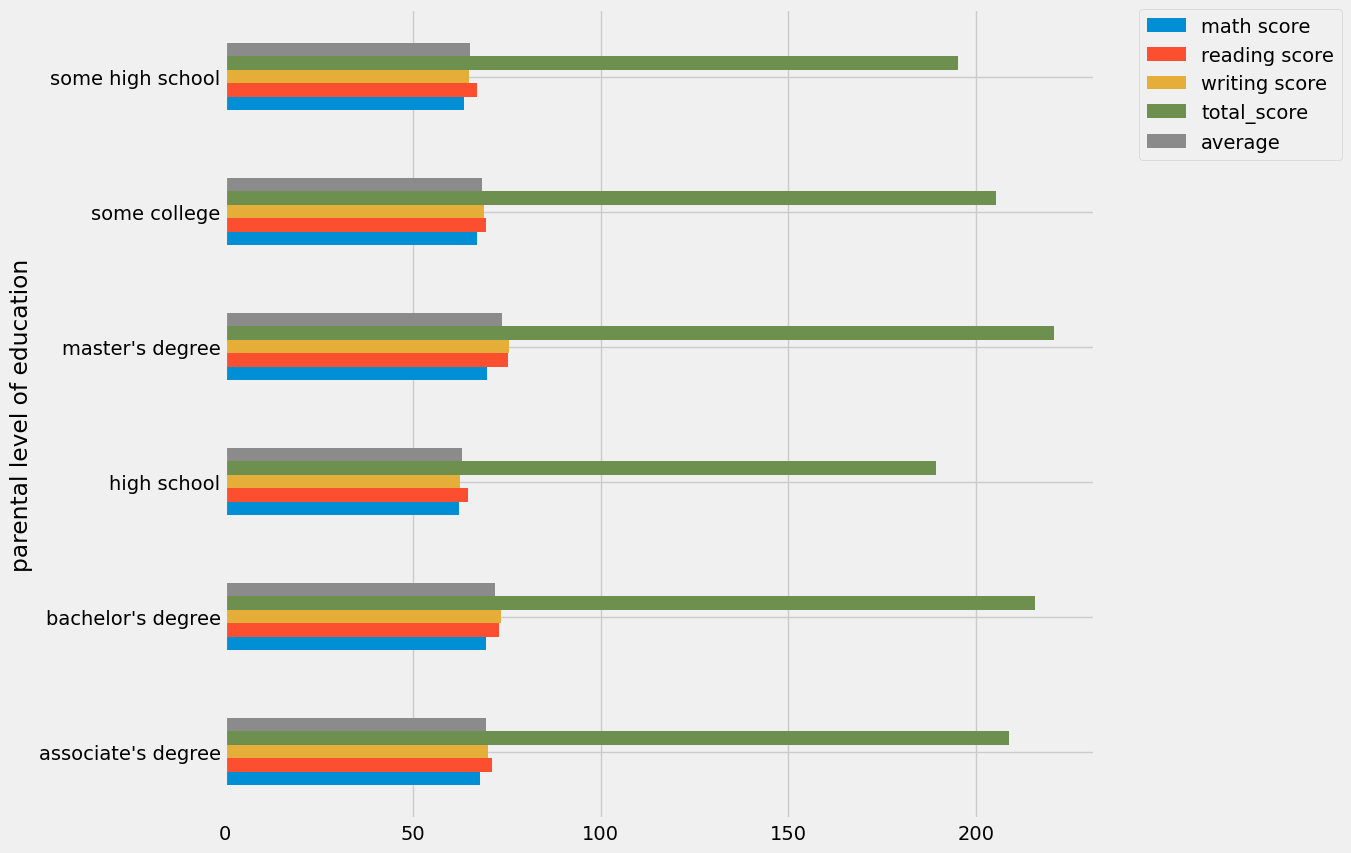

In [77]:
df.groupby('parental level of education').agg({'math score':'mean','reading score':'mean','writing score':'mean','total_score':'mean','average':'mean'}).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc = 2 ,borderaxespad = 0.)
plt.show()

### Insights 
- the score of the students whoes parents have completed masters and bachelor degree is more compared to others

## lunch column
- which type of lunch is most common among students
- what is the effect of lunch type on test results?

## univariate analysis(which type of lunch is most common among students?)

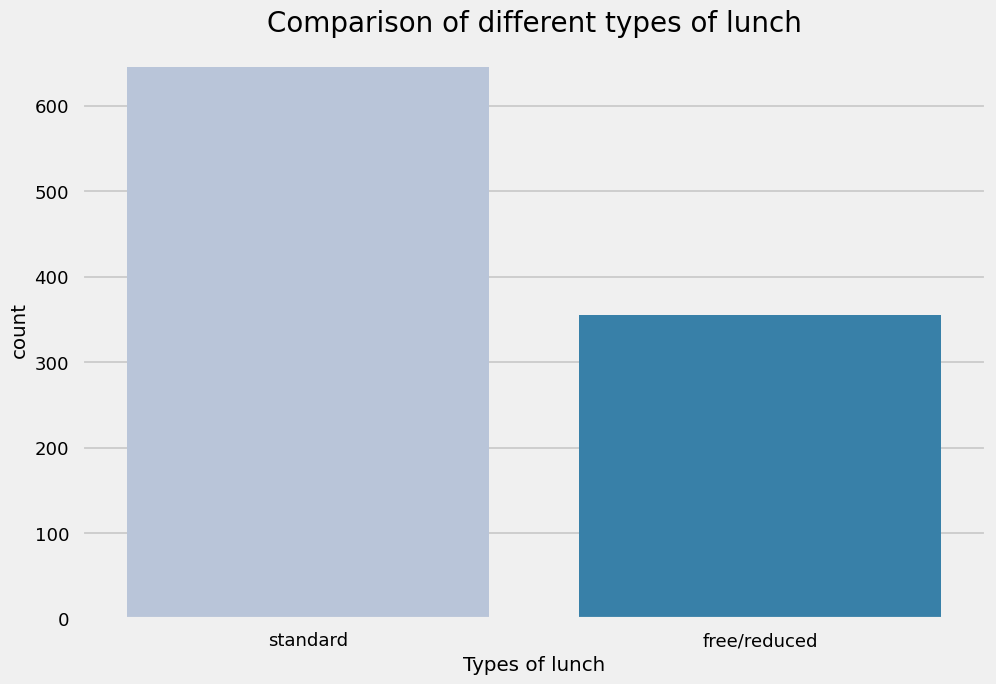

In [79]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(data = df ,x = 'lunch' , palette='PuBu')
plt.title('Comparison of different types of lunch' , fontweight = 30 ,fontsize = 20)
plt.xlabel('Types of lunch')
plt.ylabel('count')
plt.show()

## insights
- Students with standard lunch are morre compared with free/reduced lunch

#### bivariate analysis(is lunch type intake has any impact on students performance)

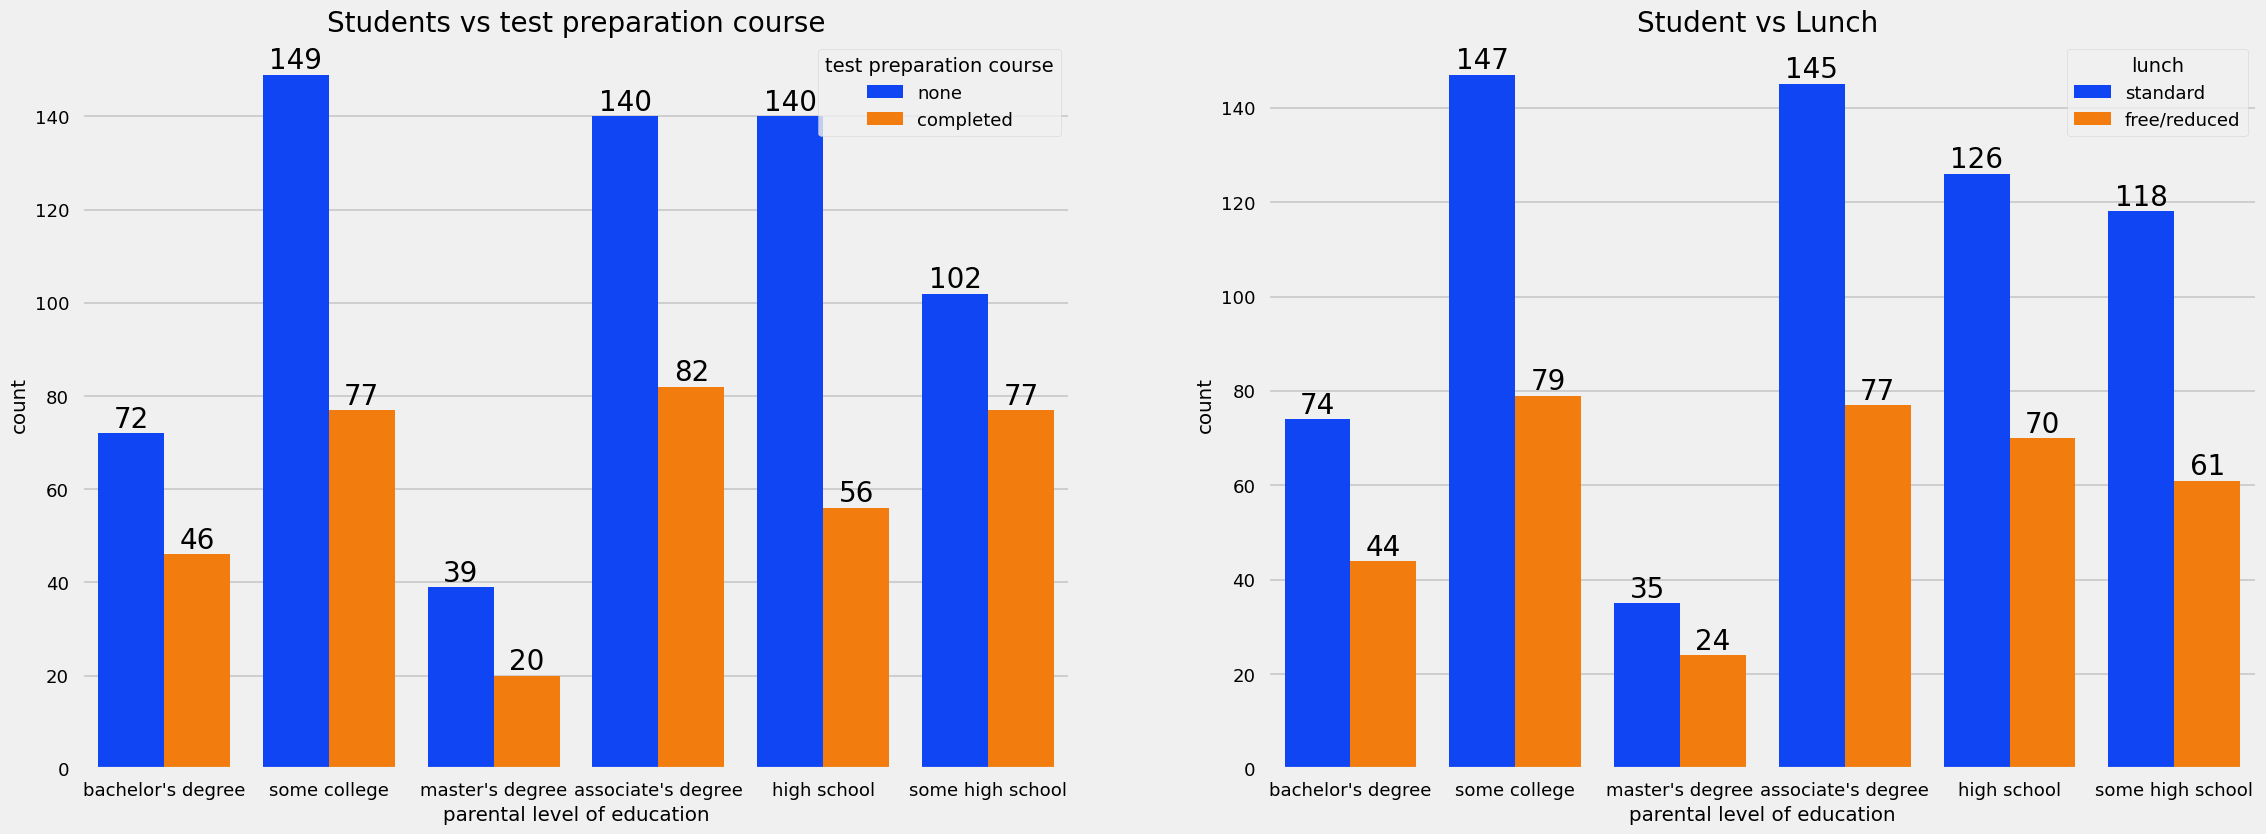

In [81]:
f,ax = plt.subplots(1,2,figsize=(25,9))
sns.countplot(x = df['parental level of education'],data = df ,palette='bright',hue = 'test preparation course',saturation=0.9,ax=ax[0])
ax[0].set_title('Students vs test preparation course',color = 'black',size= 20)
for containers in ax[0].containers:
    ax[0].bar_label(containers,color='black',size = 20)
    
sns.countplot(data = df ,x = 'parental level of education',hue = 'lunch',ax = ax[1],saturation=0.9,palette='bright')
ax[1].set_title('Student vs Lunch ',color = 'black',size = 20 )
for containers in ax[1].containers:
    ax[1].bar_label(containers,color = 'black',size = 20)
    

### Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='reading score'>

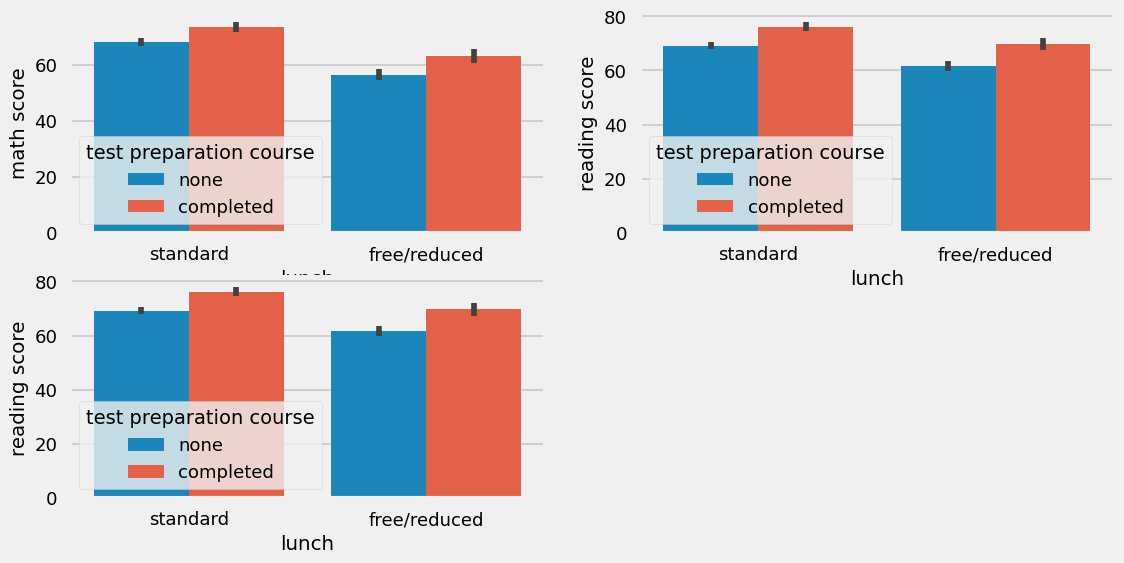

In [83]:
plt.figure(figsize = (12,6))
plt.subplot(2,2,1)
sns.barplot(x = df['lunch'],y = df['math score'],hue = df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x = df['lunch'],y = df['reading score'],hue = df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x = df['lunch'],y = df ['reading score'],hue = df['test preparation course'])

#### Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

## checking outliers

"plt.subplot(145)\nsns.boxplot(df['total_score'],color = 'black',orient='h')"

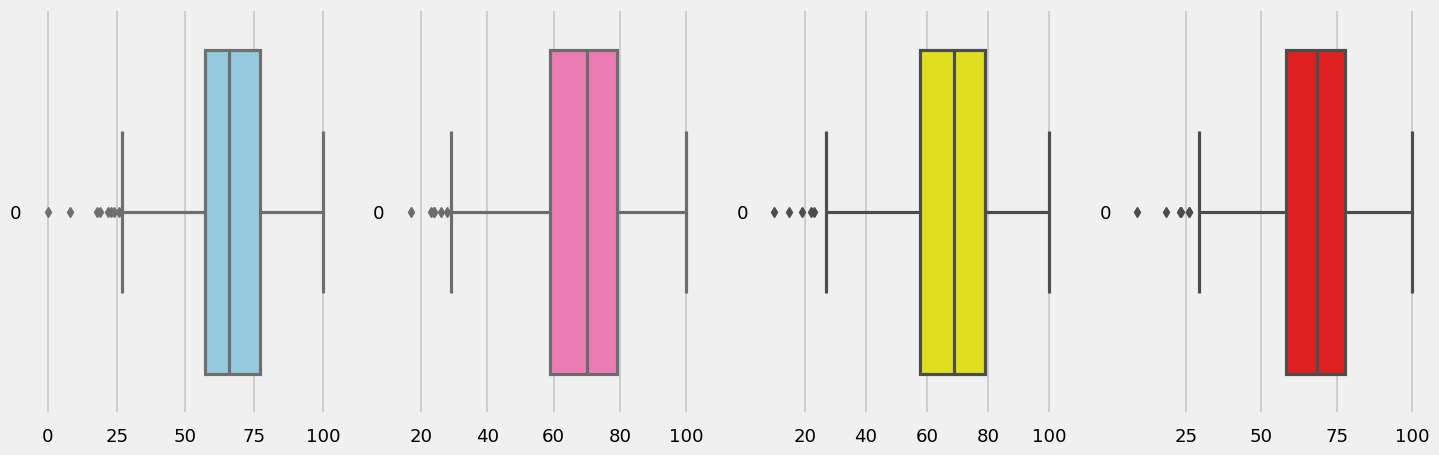

In [92]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color = 'skyblue',orient='h')
plt.subplot(142)
sns.boxplot(df['reading score'],color = 'hotpink',orient='h')
plt.subplot(143)
sns.boxplot(df['writing score'],color = 'yellow',orient='h')

plt.subplot(144)
sns.boxplot(df['average'],color = 'Red',orient='h')
'''plt.subplot(145)
sns.boxplot(df['total_score'],color = 'black',orient='h')'''

### Multivariate analysis

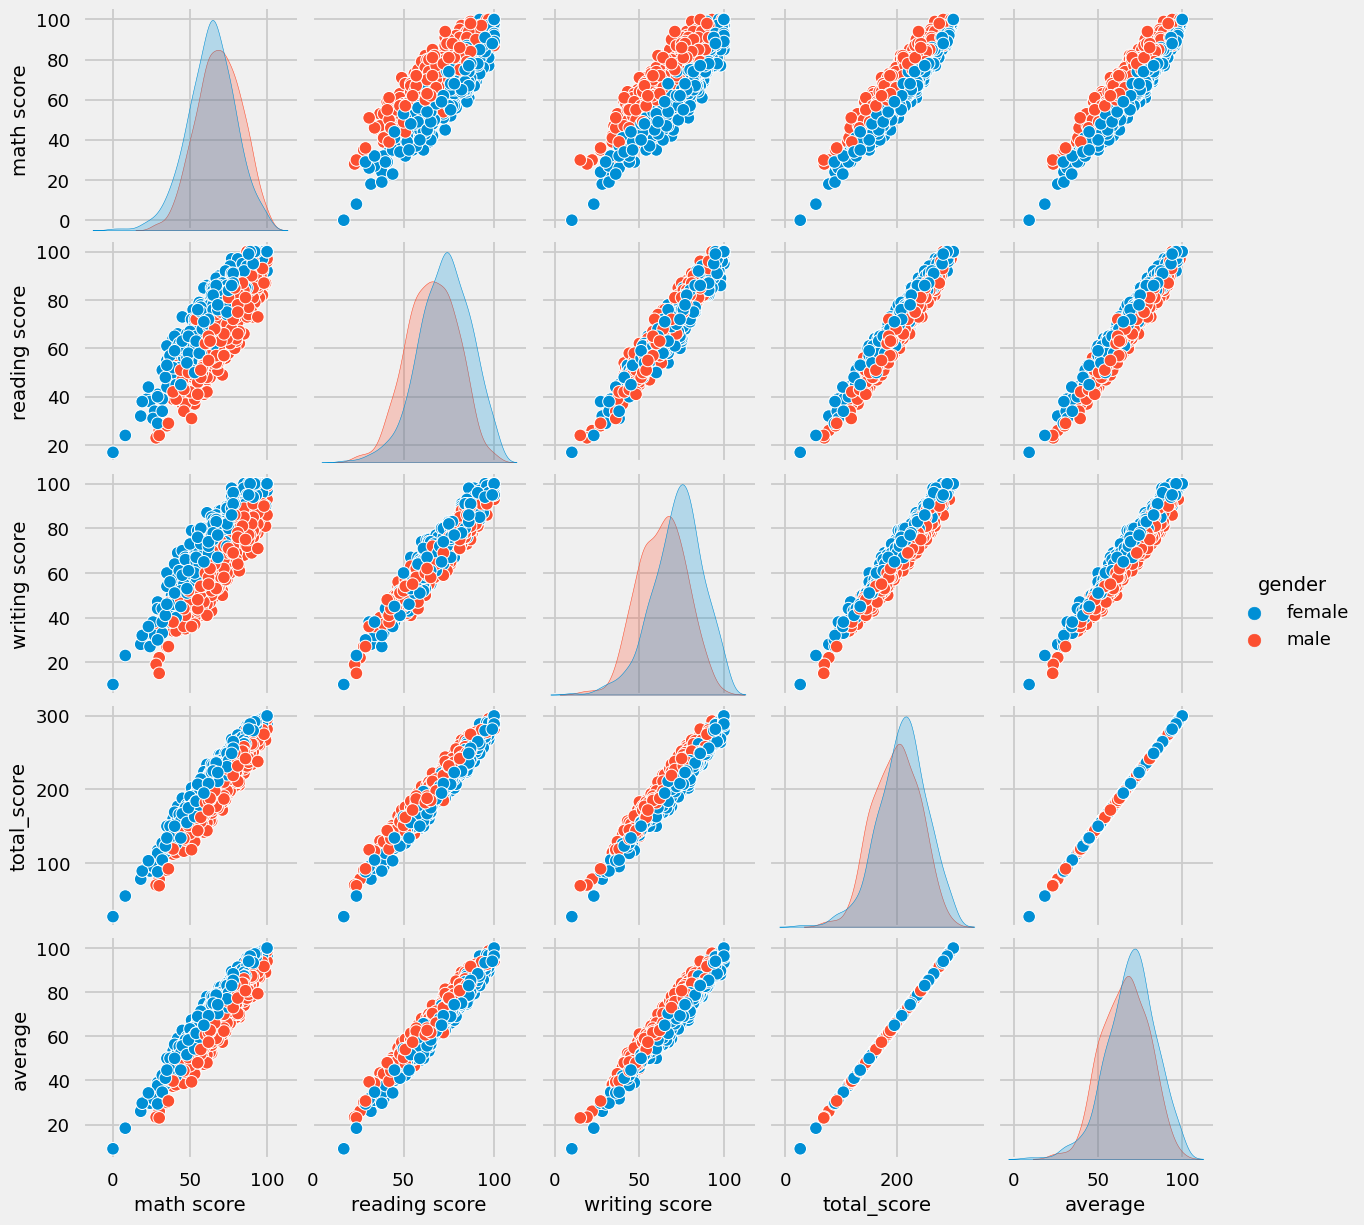

In [93]:
sns.pairplot(df,hue = 'gender')

## Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
-  Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

In [94]:
df.to_csv('cleaned.csv',index = False)